# Implementation of K-means Clustering

In [15]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

X, y = make_blobs(n_samples=1000, centers=3, n_features=2)

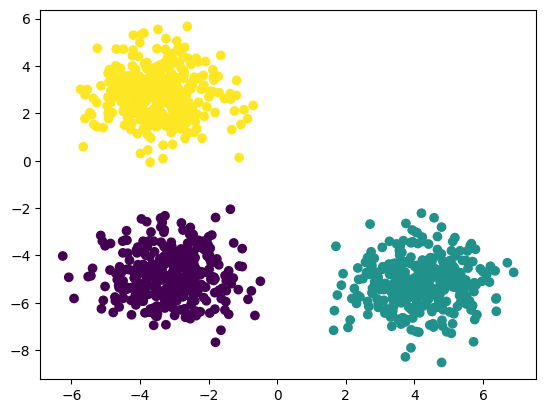

In [16]:
plt.scatter(X[:,0], X[:,1], c=y)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [19]:
from sklearn.cluster import KMeans

### Elbow  method

In [20]:
import warnings
warnings.filterwarnings("ignore")
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

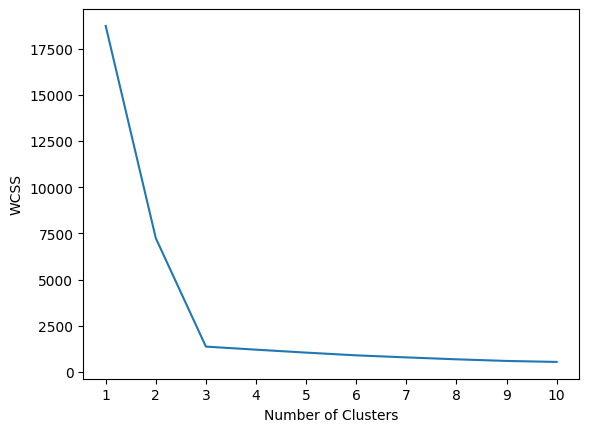

In [21]:
### Ploting elbow curve

plt.plot(range(1,11), wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [22]:
kmeans =  KMeans(n_clusters=3, init="k-means++")

In [24]:
y_labels = kmeans.fit_predict(X_train)

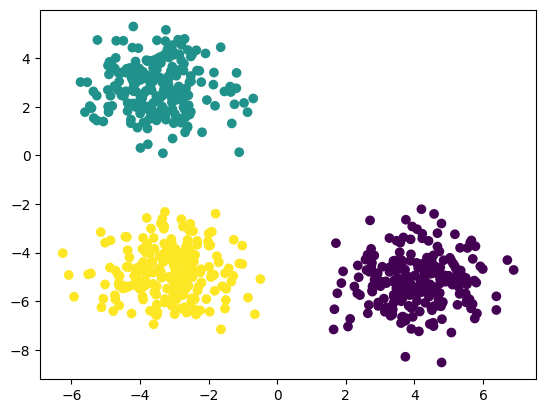

In [28]:
plt.scatter(X_train[:,0],X_train[:,1], c=y_labels)

## knee loacter

In [29]:
! pip install kneed

In [31]:
from kneed import KneeLocator

In [33]:
k1 = KneeLocator(range(1,11), wcss, curve="convex", direction="decreasing")
k1.elbow

3

## Silhoutte Score

The silhouette score is a metric used to evaluate the quality of clustering algorithms. It quantifies how well each sample in a cluster fits with its neighboring clusters. The silhouette score ranges from -1 to 1, where:

- A score close to 1 indicates that the samples are well-clustered, with a clear separation between clusters.
- A score close to 0 indicates overlapping clusters or that the sample is on or very close to the decision boundary between two neighboring clusters.
- A score close to -1 indicates that the sample is assigned to the wrong cluster.

The silhouette score is calculated for each sample in the dataset and then averaged to obtain the overall silhouette score for the clustering result.

Here's how the silhouette score is calculated:

For each sample, calculate two values:

1. a: The average distance between the sample and all other points in the same cluster.
2. b: The average distance between the sample and all points in the nearest neighboring cluster.

Compute the silhouette coefficient for each sample using the formula:
silhouette_coefficient = (b - a) / max(a, b)

The silhouette score for the clustering result is the average of all silhouette coefficients across all samples.

In [34]:
from sklearn.metrics import silhouette_score

In [40]:
silhouetee_coefficients = []

for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train, kmeans.labels_)
    silhouetee_coefficients.append(score)

In [41]:
silhouetee_coefficients

[0.5953404826060484,
 0.7491288773835547,
 0.5906495935535557,
 0.44711468123054476,
 0.3292535332326361,
 0.3437358175788842,
 0.34950555215439855,
 0.3536929117401238,
 0.34912624629800026]

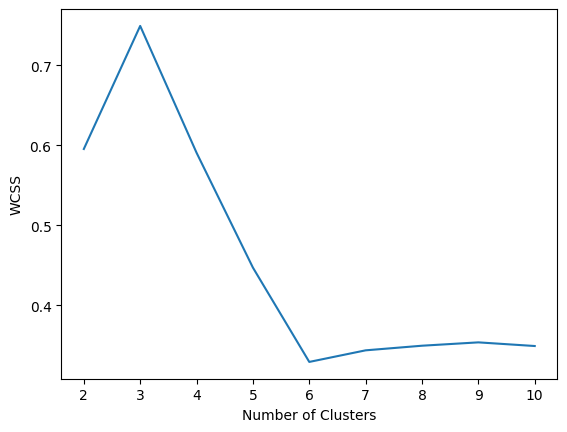

In [42]:
### Ploting elbow curve

plt.plot(range(2,11), silhouetee_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()